# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train["YEARS_BIRTH"] = app_train["DAYS_BIRTH"]/365
app_train["YEARS_BIRTH"] =app_train["YEARS_BIRTH"].apply(np.floor)
app_train["YEARS_BIRTH_grp"]=pd.cut(app_train["YEARS_BIRTH"],2)

In [6]:
print(app_train["YEARS_BIRTH"].min(),app_train["YEARS_BIRTH"].max())

20.0 69.0


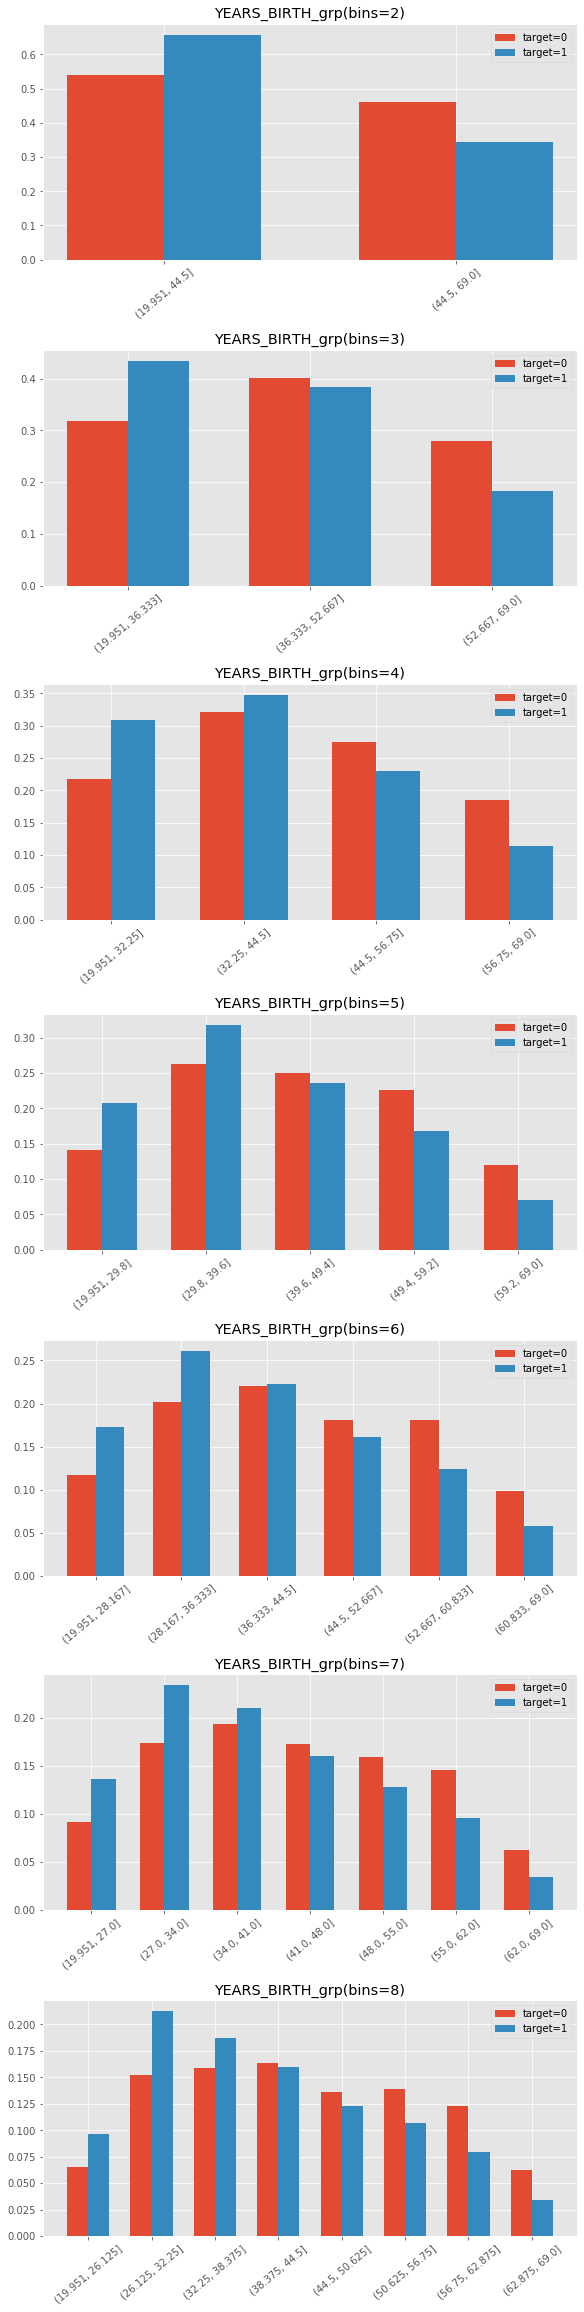

In [7]:
fig, axs = plt.subplots(nrows=7, ncols=1,figsize=(8,32),constrained_layout=True)
for i in range(7):
    app_train["YEARS_BIRTH_grp"]=pd.cut(app_train["YEARS_BIRTH"],(i+2))
    
    ax=axs[i]
    target_0 =  app_train["YEARS_BIRTH_grp"][app_train['TARGET']==0].value_counts().sort_index()
    target_1 =  app_train["YEARS_BIRTH_grp"][app_train['TARGET']==1].value_counts().sort_index()
    target_0 = target_0 /target_0.sum()
    target_1 = target_1 /target_1.sum()

    x = np.arange(len(target_1))*2  
    width = 0.35 
    
    ax.bar(x*width*1.5,target_0,width,label='target={1}'.format("YEARS_BIRTH_grp",0))
    ax.bar(x*width*1.5+width,target_1,width,label='target={1}'.format("YEARS_BIRTH_grp",1))
    
    ax.set_xticks(x*width*1.5+width*.5)
    ax.set_xticklabels(target_0.index.tolist(),rotation=40)
    ax.legend()
    ax.set_title('{0}(bins={1})'.format("YEARS_BIRTH_grp",i+2))  


從圖的一路離散化發現，target=0 和 target=1的比例會在某一個年齡段反轉，這個反轉的點大約在 年紀為 41的區域 

於是我們可以用41歲來做一個切點，設定離散化的變數

相較於 bins=2 的對半切，這樣會更明顯

Text(0.5, 1.0, 'YEARS_BIRTH_grp(bins=[20, 41, 70])')

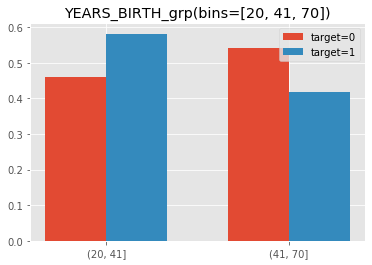

In [8]:
fig, ax = plt.subplots(1,1)
bins=[20,41,70]
app_train["YEARS_BIRTH_grp"]=pd.cut(app_train["YEARS_BIRTH"],bins=bins)
    
target_0 =  app_train["YEARS_BIRTH_grp"][app_train['TARGET']==0].value_counts().sort_index()
target_1 =  app_train["YEARS_BIRTH_grp"][app_train['TARGET']==1].value_counts().sort_index()
target_0 = target_0 /target_0.sum()
target_1 = target_1 /target_1.sum()

x = np.arange(len(target_1))*2  
width = 0.35 

ax.bar(x*width*1.5,target_0,width,label='target={1}'.format("YEARS_BIRTH_grp",0))
ax.bar(x*width*1.5+width,target_1,width,label='target={1}'.format("YEARS_BIRTH_grp",1))

ax.set_xticks(x*width*1.5+width*.5)
ax.set_xticklabels(target_0.index.tolist(),rotation=0)
ax.legend()
ax.set_title('{0}(bins={1})'.format("YEARS_BIRTH_grp",bins))  